# Plotting Cross-Validated Predictions On The Boston Dataset

This notebook illustrates finding feature importance in the Boston dataset. It is a version of the Scikit-Learn example [Plotting Cross-Validated Predictions](http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py).

The main point it shows is using pandas structures throughout the code, and integrate nicely with seaborn.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
import seaborn as sns
sns.set_style('whitegrid')
sns.despine()

from ibex import trans
from ibex.sklearn import linear_model as pd_linear_model
from ibex.sklearn import decomposition as pd_decomposition
from ibex.sklearn import preprocessing as pd_preprocessing
from ibex.sklearn import ensemble as pd_ensemble
from ibex.sklearn import model_selection as pd_model_selection

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Loading The Data 

First we load the dataset into a ``pandas.DataFrame``.

In [2]:
dataset = datasets.load_boston()
boston = pd.DataFrame(dataset.data, columns=dataset.feature_names)
features = dataset.feature_names
boston['price'] = dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Building The Cross Validated Predictions

We will use a linear predictor, and a random forest predictor. 

In [3]:
linear_y_hat = pd_model_selection.cross_val_predict(
    pd_linear_model.LinearRegression(),
    boston[features],
    boston.price)
linear_y_hat.head()

0    30.598898
1    24.489412
2    29.747524
3    28.648380
4    27.552867
dtype: float64

In [4]:
linear_cv= pd.concat([linear_y_hat, boston.price], axis=1)
linear_cv['type'] = 'linear'
linear_cv.columns = ['y_hat', 'y', 'regressor']
linear_cv.head()

,y_hat,y,regressor
0,30.598898,24.0,linear
1,24.489412,21.6,linear
2,29.747524,34.7,linear
3,28.648380,33.4,linear
4,27.552867,36.2,linear


In [5]:
rf_y_hat = pd_model_selection.cross_val_predict(
    pd_ensemble.RandomForestRegressor(),
    boston[features],
    boston.price)
rf_cv= pd.concat([rf_y_hat, boston.price], axis=1)
rf_cv['type'] = 'rf'
rf_cv.columns = ['y_hat', 'y', 'regressor']

In [6]:
cvs = pd.concat([linear_cv, rf_cv])

## Plotting The Cross-Validated Predictions

Finally, we can plot the results:

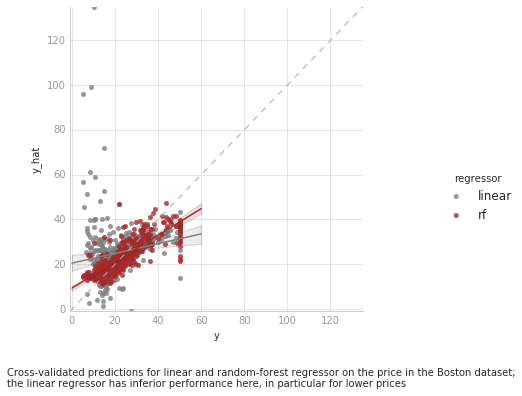

In [7]:
min_, max_ = cvs[['y_hat', 'y']].min().min(), cvs[['y_hat', 'y']].max().max()
sns.lmplot(
    x='y', 
    y='y_hat', 
    hue='regressor', 
    data=cvs,
    palette={'linear': 'grey', 'rf': 'brown'});
plot(np.linspace(min_, max_, 100), np.linspace(min_, max_, 100), '--', color='darkgrey');
tick_params(colors='0.6')
xlim((min_, max_))
ylim((min_, max_))
figtext(
    0, 
    -0.1, 
    'Cross-validated predictions for linear and random-forest regressor on the price in the Boston dataset;\n'
    'the linear regressor has inferior performance here, in particular for lower prices');